In [1]:
#Chn2Pyr testing

In [2]:
import numpy as np
from neuron import h
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
#do not rerun
h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","nrnmech.dll"))
h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","x86_64",".libs","libnrnmech.so"))
#fileList = ['class_pyramidalcell_original_modified.hoc','class_axoaxoniccell.hoc']
#fileList = ['class_pyramidalcell.hoc','class_axoaxoniccell.hoc']
fileList = ['class_pyramidalcell.hoc']
#for each file, load it into the hoc interpreter so it can be accessed
for item in fileList:
    h.load_file(os.path.join("biophys_components/templates/",item))
callNames = ["h." + fileList[i].split('_')[1].split('.')[0] + "()" for i in range(len(fileList))]
callNames.sort()
for i in range(len(callNames)):
    myCell = eval(callNames[i])
    for sec in h.allsec(myCell):
        print(sec)

pyramidalcell[0].soma[0]
pyramidalcell[0].apical[0]
pyramidalcell[0].apical[1]
pyramidalcell[0].apical[2]
pyramidalcell[0].apical[3]
pyramidalcell[0].apical[4]
pyramidalcell[0].apical[5]
pyramidalcell[0].apical[6]
pyramidalcell[0].apical[7]
pyramidalcell[0].apical[8]
pyramidalcell[0].basal[0]
pyramidalcell[0].basal[1]
pyramidalcell[0].basal[2]
pyramidalcell[0].basal[3]
pyramidalcell[0].axon[0]
pyramidalcell[0].axon[1]
pyramidalcell[0].axon[2]
pyramidalcell[0].axon[3]
pyramidalcell[0].axon[4]
pyramidalcell[0].axon[5]
pyramidalcell[0].axon[6]
pyramidalcell[0].axon[7]
pyramidalcell[0].axon[8]
pyramidalcell[0].axon[9]
pyramidalcell[0].axon[10]
pyramidalcell[0].axon[11]


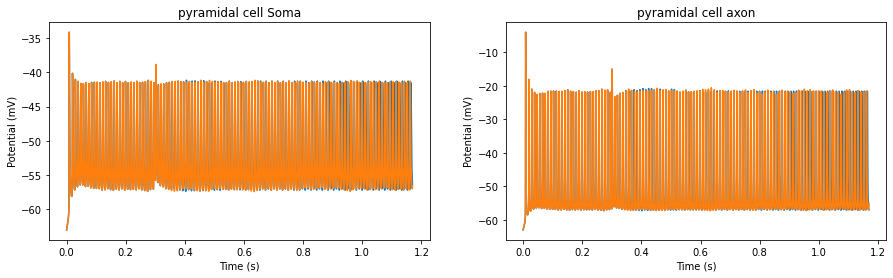

"\nfig,axs = plt.subplots(1,2,figsize=(15,4))\nplt.subplots_adjust(hspace=0.5)\nstart,k = 0,0\nfor j in range(2):\n    axs[j].plot(time[:5850],res[:5850,start:start+len(InjList[k])])\n    axs[j].set_title(callNames[k].split('.')[1].split('()')[0])\n    axs[j].set_xlabel('Time (s)')\n    axs[j].set_ylabel('Potential (mV)')\n    start += len(InjList[k])\n\n    k+=1\n"

In [4]:

AxonNo = 6
#InjList = [np.arange(400,500,50),#aac
#           np.arange(200,550,50)]#pyr
a = 400
InjList = [np.arange(a-10,a+10,10),np.arange(a-10,a+10,10)]
allTrials = []
allTrialsVas = []
for i in range(len(callNames)):
    myCell = eval(callNames[i])#make the cell
    Ia = InjList[i] /1000# nA ->pA# the current sweep for this particular cell
    allVs = []
    allVas = []
    for j in range(len(Ia)):#test it at each current injection and save        
        iclamp = h.IClamp(myCell.axon[AxonNo](0.5))
        iclamp.delay = 300
        iclamp.dur = 2
        iclamp.amp = Ia[j]
        v = h.Vector().record(myCell.soma[0](0.5)._ref_v)
        va = h.Vector().record(myCell.axon[AxonNo](0.5)._ref_v)
        h.dt=0.2
        h.finitialize(-63)
        h.continuerun(1500)
        V = np.array(v)
        Va = np.array(va)
        allVs.append(V)
        allVas.append(Va)
    allTrials.append([allVs])#list of lists; each sublist has the current sweeps for the given cell
    allTrialsVas.append([allVas])
res = np.concatenate(allTrials,axis=1)[0].T#how I plotted it the first time.
resVa = np.concatenate(allTrialsVas,axis=1)[0].T#how I plotted it the first time.
time = np.arange(0,res.shape[0]*h.dt/1000,h.dt/1000)#time in seconds

start = 0
fig,axs = plt.subplots(1,2,figsize=(15,4))
axs[0].plot(time[:5850],res[:5850,start:start+len(InjList[1])])
axs[0].set_title('pyramidal cell Soma')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Potential (mV)')

axs[1].plot(time[:5850],resVa[:5850,start:start+len(InjList[1])])
axs[1].set_title('pyramidal cell axon')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Potential (mV)')
plt.show()


"""
fig,axs = plt.subplots(1,2,figsize=(15,4))
plt.subplots_adjust(hspace=0.5)
start,k = 0,0
for j in range(2):
    axs[j].plot(time[:5850],res[:5850,start:start+len(InjList[k])])
    axs[j].set_title(callNames[k].split('.')[1].split('()')[0])
    axs[j].set_xlabel('Time (s)')
    axs[j].set_ylabel('Potential (mV)')
    start += len(InjList[k])

    k+=1
"""
#plt.savefig('current sweeps.png',dpi=500)

In [5]:
#RB is .3 nA, but I need at least 50 nA into the axon to spike the soma

In [6]:
callNames

['h.pyramidalcell()']

In [7]:
#AAC = eval(callNames[0])
Pyr = h.pyramidalcell()


In [8]:
for item in Pyr.axon[0].allseg():
    print(item)

pyramidalcell[2].axon[0](0)
pyramidalcell[2].axon[0](0.5)
pyramidalcell[2].axon[0](1)


In [9]:
h.psection(sec = Pyr.axon[0])

pyramidalcell[2].axon[0] { nseg=1  L=10  Ra=50
	pyramidalcell[2].soma[0] connect pyramidalcell[2].axon[0] (0), 0
	/* First segment only */
	insert morphology { diam=3.53}
	insert capacitance { cm=1}
	insert pas { g_pas=3.57143e-05 e_pas=-63}
	insert na16 { gbar_na16=256}
	insert na_ion { ena=50}
	insert kv { gbar_kv=100}
	insert k_ion { ek=-77}
}


1.0